<a href="https://colab.research.google.com/github/Evelyn-Rojas/Ecuaciones-diferenciales-parciales-ll/blob/main/M%C3%A9todoColocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='pink'> **Evelyn Tania Rojas Roa**
____

<font color='salmon'> **MÉTODO DE COLOCACIÓN**
_____

Considerar el siguiente problema:

 $$u'' + u = x$$

s.a

$$u(0) = 0$$
$$u'(0) = 2$$

Solución exacta:

$$u( x) = x + \sin(x)$$

Se necesita la aproximación de la forma:

$$u_N = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3 + \ldots$$

Utilizando:

$$ x= 1/2 $$

$$ x= 1/4 $$

Obtener la aproximación cúbica

In [30]:
#Importamos las librerías necesarias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [31]:
x=sp.symbols('x') #variable
u=sp.Function('u') #esto es una función

In [32]:
#Obtenemos la solución
ode=u(x).diff(x,x)+u(x)-x
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [14]:
#Ingresamos las condiciones iniciales del problema
sol=sp.dsolve(ode,ics={u(0):0, u(x).diff(x).subs(x,0):2})
#es la estructura de un diccionario

Solución exacta:

In [33]:
sol

Eq(u(x), x + sin(x))

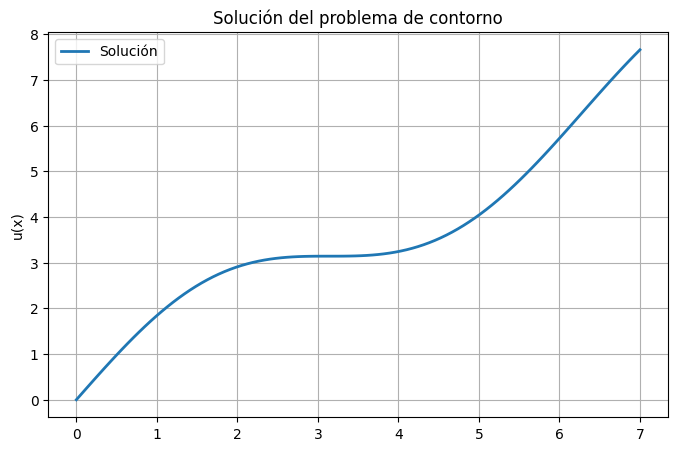

In [34]:
u_expr=sol.rhs #Extrae la expresión simbólica de la solución
u_num=sp.lambdify(x,u_expr, 'numpy') #Convierte la expresión simbólica de sympy a una función numérica rápida compatible con numpy
xx=np.linspace(0,7,100) #Genera números aleatorios
yy=u_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx,yy,label='Solución',linewidth=2)
plt.title('Solución del problema de contorno')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

<font color='lightpink'>**Aplicación del método:**

In [35]:
a,b=sp.symbols('a b') #Definimos lo coeficientes

In [36]:
# Coeficientes iniciales (obtenidos de las condiciones u(0)=0 y u'(0)=2)
alpha_0 = 0
alpha_1 = 2

In [37]:
#Solución aproximada cúbica (u_n)
u_n = alpha_0 + alpha_1 * x + a * x**2 + b * x**3

In [38]:
u_n_2=sp.diff(u_n,x,2)

In [39]:
err = u_n_2 + u_n- x

In [40]:
#Puntos de colocación
points=[sp.Rational(1,2),sp.Rational(1)]

In [41]:
print('Puntos de colocación:' ,points)

Puntos de colocación: [1/2, 1]


In [42]:
eqs=[sp.Eq(err.subs(x,p),0) for p in points]
#Resolver para a y b
sol_1=sp.solve(eqs,[a,b])

In [43]:
a_val = sol_1[a]
b_val = sol_1[b]

In [44]:
print(f"Coeficientes resueltos: a2={a_val}, a3={b_val}")

Coeficientes resueltos: a2=-1/17, a3=-2/17


In [45]:
print('Sistema de ecuaciones simbólico')
for eq in eqs:
 sp.pprint(eq)

Sistema de ecuaciones simbólico
9⋅a   25⋅b   1    
─── + ──── + ─ = 0
 4     8     2    
3⋅a + 7⋅b + 1 = 0


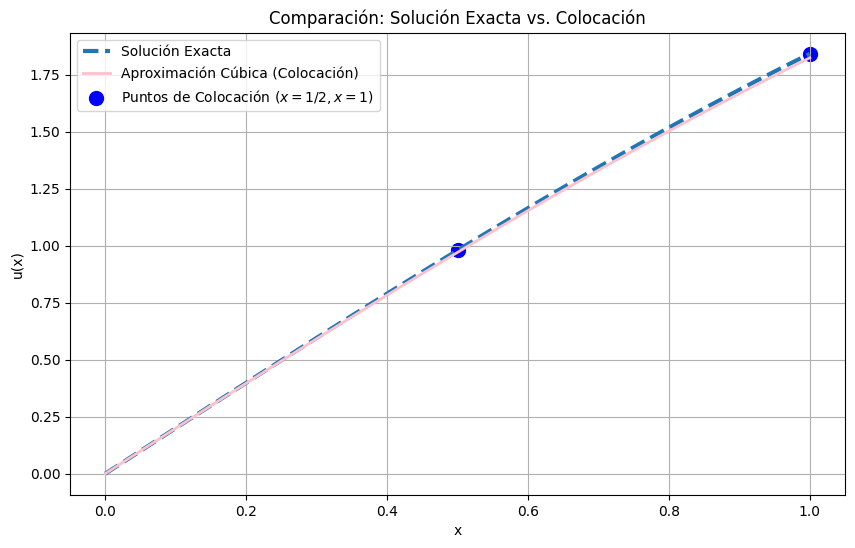

In [56]:
xx = np.linspace(0, 1, 100) #Usamos ese rango ya que son los de nuestros puntos de colocación
# Valores para graficar
yy = u_num(xx)
yy_aprox = u_aprox_num(xx)
# Puntos de colocación
x_colocacion = np.array([0.5, 1.0])
# Calcular valores exactos en los puntos de colocación
y_exacta_colocacion = u_num(x_colocacion)
# Valores aproximados en los puntos de colocacion
y_aprox_colocacion = u_aprox_num(x_colocacion)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy, label='Solución Exacta', linewidth=3, linestyle='--')
plt.plot(xx, yy_aprox, label='Aproximación Cúbica (Colocación)', linewidth=2, color='pink')
plt.scatter(x_colocacion, y_exacta_colocacion,
            color='blue',
            s=100, # Tamaño del marcador
            marker='o',
            label='Puntos de Colocación ($x=1/2, x=1$)')

plt.title('Comparación: Solución Exacta vs. Colocación')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

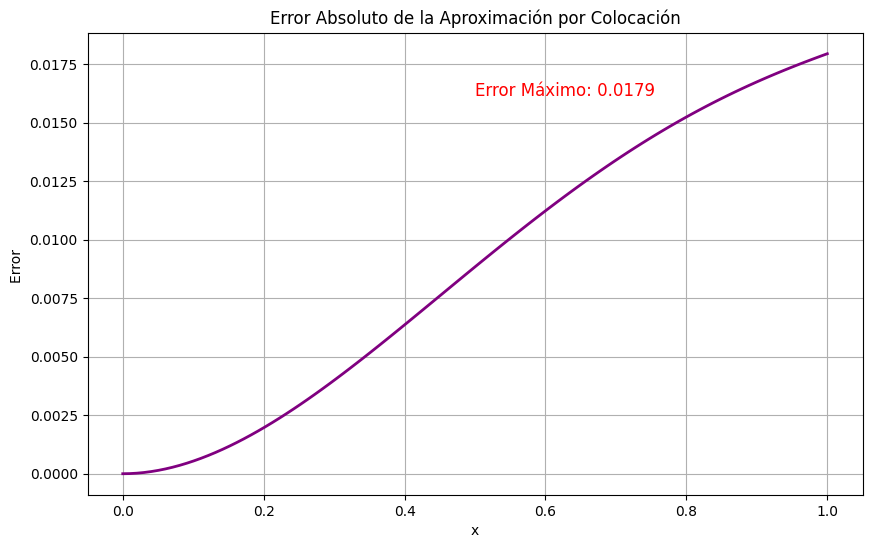

In [57]:
u_aprox_expr = u_n.subs({a: a_val, b: b_val}) # Usando la u_n y coeficientes del paso anterior
#Definimos el error
error_expr = sp.Abs(u_exacta_expr - u_aprox_expr)
#Convertir el error a función numérica
error_num = sp.lambdify(x, error_expr, 'numpy')
# Valores
xx = np.linspace(0, 1, 100)
yy_error = error_num(xx)
# Graficar el Error
plt.figure(figsize=(10, 6))
plt.plot(xx, yy_error, color='purple', linewidth=2)
plt.title('Error Absoluto de la Aproximación por Colocación')
plt.xlabel('x')
plt.ylabel('Error ')
plt.grid(True)
# Identificar el error máximo
error_max = np.max(yy_error)
plt.annotate(f'Error Máximo: {error_max:.4f}',
             xy=(0.5, error_max * 0.9),
             xytext=(0.5, error_max * 0.9),
             fontsize=12, color='red')
plt.show()
